## Lab for Linear Regression

In [3]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [4]:
def comparison_plot(Y, Yhat):
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    E = np.sum(np.square(Y-Yhat))
    
    plt.title('Predicted vs True values')
    plt.xlabel('Y')
    plt.ylabel('Yhat')
    plt.axline((Y.mean(), Y.mean()), (Y.mean()+1, Y.mean()+1), linewidth=1, color='r')
    plt.scatter(Y, Yhat)
    plt.text(Y.max(), Yhat.min(),
         f'MSE={np.round(E/Y.shape[0], 2)}',
         horizontalalignment='right',
         verticalalignment='bottom',
        fontsize=10)
    plt.show()
    


### Distance to a moving object (simulated data)

We will begin by looking at Figures 1 and 2 in the [Linear Regression](../notes/main.pdf) notes.

In Figure 1 we began with simulated data that represents the distance from an observer to a a moving object.
We will generate that data.  The observations occur at times $0, 1, 2, \ldots, 9$.

In [5]:
# Create a 1-d numpy array containing 0,1,...,9
x = np.array(range(10))

Let's suppose that the true velocity of the object is $15$ m/s and the initial distance to the object is $150$ m.  Then
the object's position is given by $d=150-15x$ where $x$ is time.  However, when we measure the distance, there is a random error
of between $-10$ and $10$ meters. The function `np.random.uniform` returns uniformly distributed random numbers within a given range.

In [6]:
y = 150-15*x+np.random.uniform(-10,10,size=x.shape[0])

We will plot the data points $(x,y)$.

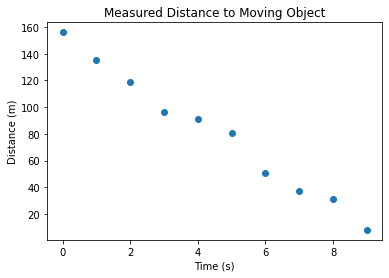

In [7]:
plt.title('Measured Distance to Moving Object')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.scatter(x,y)
plt.show()

The points are roughly on a line, but not exactly, due to the error.  The
data matrix $X$ for this problem consists of two columns, one of which is $0,1,2,\ldots, 9$ and the other
is $1,1,1,1,\ldots$. (See section 1.3 in the notes).

We make this by:
- converting x to a column vector
- creating a column vector of 1's
- concatenating these

In [8]:
X=np.concatenate([x.reshape(-1,1),np.ones(shape=(x.shape[0],1))],axis=1)

The Y vector is our vector of measurements, except we need to make it a column vector.

In [9]:
Y = y.reshape(-1,1)

Now we will use the formulae in equations (7) and (8) from the notes t compute the least squares line.


In [10]:
D = np.dot(X.transpose(),X)

The matrix $M$ contains the slope and intercept of our least squares line.

In [11]:
M = np.dot(np.linalg.inv(D),np.dot(X.transpose(), Y))
print('Slope is {}, Intercept is {}'.format(M[0,0],M[1,0]))

Slope is -15.837775943334652, Intercept is 151.9204110391644


The predicted values of $Y$ are given by equation (8).

In [12]:
Yhat = np.dot(np.dot(np.dot(X,np.linalg.inv(D)),X.transpose()),Y)

Let's add these predicted values to our plot for comparison.  Notice that the green
dots lie along the regression line.

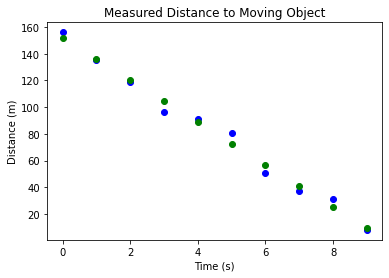

In [13]:
# f.scatter(x=x,y=Yhat[:,0],color='green')
# show(f)

plt.title('Measured Distance to Moving Object')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.scatter(x, y, color='b')
plt.scatter(x, Yhat, color='g')
plt.show()

We can connect the dots to see the line of best fit.

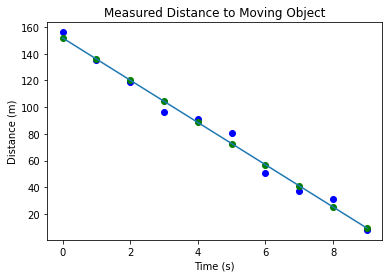

In [14]:
# f.line(x=x,y=Yhat[:,0],color='green')
# show(f)

plt.title('Measured Distance to Moving Object')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.scatter(x, y, color='b')
plt.scatter(x, Yhat, color='g')
plt.plot(x,Yhat)
plt.show()

In [15]:
Y.shape
Yhat.shape

(10, 1)

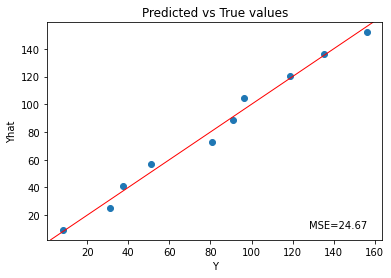

In [16]:
# show(comparison_plot(Y[:,0], Yhat[:,0]))
comparison_plot(Y[:, 0], Yhat[:, 0])

# The MPG Data

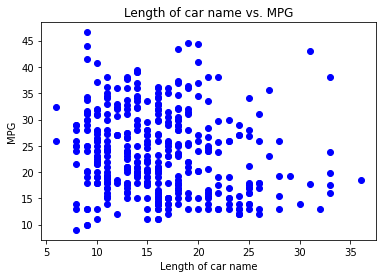

In [17]:
filepath = r'D:\MATH3094\data\auto-mpg\auto-mpg.csv'
mydata = np.loadtxt(filepath, dtype=np.dtype('U40'), delimiter=',', skiprows=1)
header = np.loadtxt(filepath,delimiter=",",comments="\n",dtype=np.unicode_,max_rows=1)
header = np.char.strip(header,'"')

x = mydata[:, [np.where(header == 'car name')[0][0]]].flatten()
x = np.array([len(i) for i in x])
y = mydata[:, [np.where(header == 'mpg')[0][0]]].astype(np.dtype(float))

# Plot the data
plt.title('Length of car name vs. MPG')
plt.xlabel('Length of car name')
plt.ylabel('MPG')
plt.scatter(x, y, color='b')
plt.show()

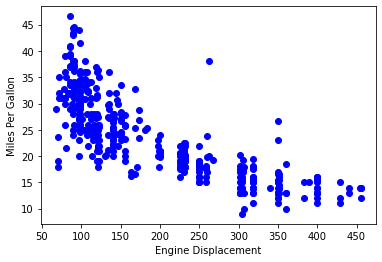

(398, 1)

In [18]:
filepath = r'D:\MATH3094\data\auto-mpg\auto-mpg.csv'
mydata = np.loadtxt(filepath, dtype=np.dtype('U40'), delimiter=',', skiprows=1)
header = np.loadtxt(filepath,delimiter=",",comments="\n",dtype=np.unicode_,max_rows=1)
header = np.char.strip(header,'"')

X = mydata[:, [np.where(header == 'displacement')[0][0]]].astype(np.dtype(float))
Y = mydata[:, [np.where(header == 'mpg')[0][0]]].astype(np.dtype(float))

# Plot the data
plt.xlabel('Engine Displacement')
plt.ylabel('Miles Per Gallon')
plt.scatter(X, Y, color='b')
plt.show()
Y.shape

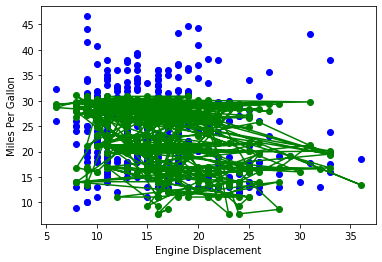

In [19]:
X = np.append(X, np.ones([len(X), 1]), axis=1)

D = np.dot(X.transpose(), X)
M = np.dot(np.linalg.inv(D), np.dot(X.transpose(), Y))
Yhat = np.dot(np.dot(np.dot(X, np.linalg.inv(D)), X.transpose()), Y)


plt.xlabel('Engine Displacement')
plt.ylabel('Miles Per Gallon')
plt.scatter(x, y, color='b')
plt.plot(x, Yhat, color='g')
plt.scatter(x, Yhat, color='g')
plt.show()


### Residuals

One way to evaluate the fit of the line to the data is to compare Y and Yhat.  Let's make a scatter plot of Y vs Yhat to see
how they compare.  If the fit is good, the points should cluster around the diagonal line y=x.



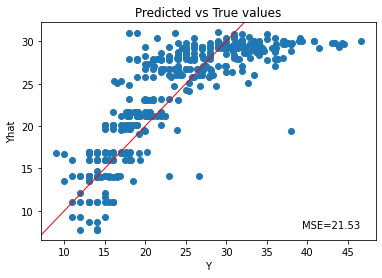

In [20]:
# show(comparison_plot(Y,Yhat))
comparison_plot(Y,Yhat)

Our MSE is 21.56.

Notice that there are a lot of cars with Yhat=30 mpg but whose true mpg (Y) are between 15 and almot 50 mpg.  This means that, while engine displacement may be a good predictor of mileage for cars with relatively low mileage, among cars with higher mileage, something else must be going on.

### Multivariate Data

For our first experiments with multivariate data, we will start with simulated data.




In [21]:
filepath = r'D:\MATH3094\data\multivar_simulated\data.csv'
data = np.genfromtxt(filepath,skip_header=1,delimiter=',')
mydata = np.loadtxt(filepath, dtype=np.dtype('U40'), delimiter=',', skiprows=1)

Let's look at the data, just the first few rows.

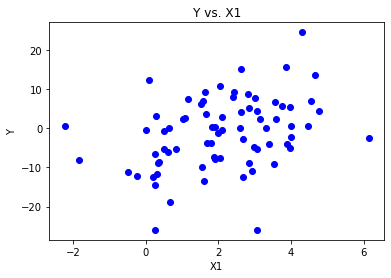

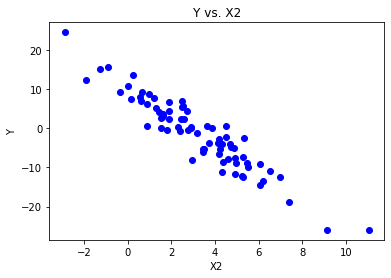

In [22]:
Y = mydata[:, 1].astype(np.dtype(float))
X = mydata[:, 2:].astype(np.dtype(float))
X = np.append(X,np.ones([len(X),1]),1)

# Plot y vs. X1 and X2
plt.title('Y vs. X1')
plt.xlabel('X1')
plt.ylabel('Y')
plt.scatter(X[:,0], Y, color='b')
plt.show()
plt.title('Y vs. X2')
plt.xlabel('X2')
plt.ylabel('Y')
plt.scatter(X[:,1], Y, color='b')
plt.show()

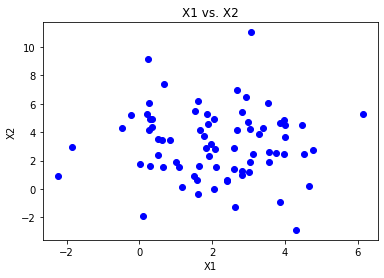

In [23]:
# Plot X1 vs X2
plt.title('X1 vs. X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:,1], color='b')
plt.show()

We append a column of ones to the data matrix.

Let's look at the relationship between the three columns.  First, how does the response Y depend on
the two columns of data? Plot Y vs X0 and X1 and show the result.

In [24]:
Y = mydata[:, 1].astype(np.dtype(float))
X = mydata[:, 2:].astype(np.dtype(float))


#Compute the regression matrices D, Dinv, M, and Yhat
D = np.dot(X.transpose(), X)
Dinv = np.linalg.inv(D)
M = np.dot(Dinv, np.dot(X.transpose(), Y))


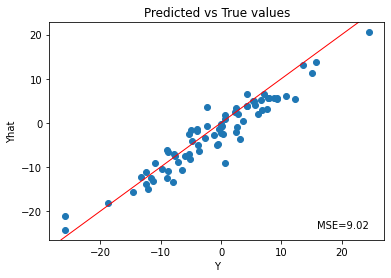

In [25]:
Yhat = np.dot(np.dot(np.dot(X,np.linalg.inv(D)),X.transpose()),Y)
comparison_plot(Y,Yhat)

### Covariance Matrix

Let's go back to look at the covariance matrix of the variables X0 and X1.  This computed using centered coordinates.

In [26]:
X0 = X[:,0:2] - X[:,0:2].mean()

D0 = np.dot(X0.transpose(), X0)
Cov0 = D0 / X0.shape[0]
print(Cov0)

[[ 2.7923708  -0.43723231]
 [-0.43723231  6.0932078 ]]


Notice that the off diagonal elements, which are the covariances of X0 and X1, are small in comparison to the diagonal elements.
This reflects the fact that X0 and X1 are relatively (linearly) independent of each other.

### The correlation coefficient

Pearson's $R^2$ is a quantitative measure of the strength of the linear relationship between two variables $X$ and $Y$. It is computed
as
$$
R^{2} = \frac{\sigma_{XY}^2}{\sigma_{X}^2\sigma_{Y}^2}
$$
From our matrix this is the offdiagonal element divided by the product of the diagonal elements.  It it's close to $1$, there is a strong relationship, if close to zero, there is not. In this case, the $R^2$ is essentially zero.

In [27]:


# compute the correlation coefficient.  Is it close to 1?  Why or why not?

R = 1 - np.sqrt(np.square(Cov0[0, 1]) / np.square(Cov0[0, 0] * Cov0[1, 1]))
print(R)

0.97430236395389


### Multivariate MPG data

Now let's refine our look at the MPG data by considering displacement, miles per gallon, and vehicle weight.
- column 0 is mpg
- column 2 is displacement
- column4 is vehicle weight

In [28]:
from itertools import combinations

In [29]:
filepath = r'D:\MATH3094\data\auto-mpg\auto-mpg.csv'
# data = np.genfromtxt(filepath,delimiter=',',skip_header=1)
data = np.loadtxt(filepath, dtype=np.dtype('U40'), delimiter=',', skiprows=1)
header = np.loadtxt(filepath,delimiter=",",comments="\n",dtype=np.unicode_,max_rows=1)
header = np.char.strip(header,'"')

# data = np.genfromtxt('../data/auto-mpg/auto-mpg.csv',delimiter=',',skip_header=1)

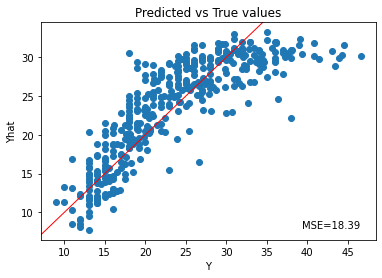

MSE=18.38774383218244


In [30]:
X = data[:, [np.where(header == 'cylinders')[0][0], np.where(header == 'displacement')[0][0], np.where(header == 'weight')[0][0]]].astype(np.dtype(float))
X = np.append(X,np.ones([X.shape[0], 1]), 1)
Y = data[:, [np.where(header == 'mpg')[0][0]]].astype(np.dtype(float))

D = np.dot(X.transpose(), X)
Dinv = np.linalg.inv(D)
M = np.dot(Dinv, np.dot(X.transpose(), Y))
Yhat = np.dot(np.dot(np.dot(X,np.linalg.inv(D)),X.transpose()),Y)
comparison_plot(Y,Yhat)

E = np.sum(np.square(Y-Yhat))
print(f'MSE={E/Y.shape[0]}')

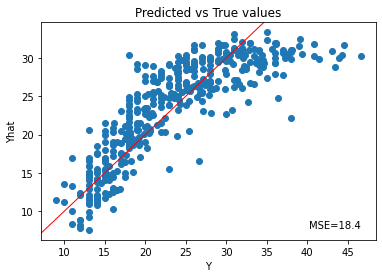

MSE=18.404140933712625


In [31]:
X = data[:, [np.where(header == 'displacement')[0][0], np.where(header == 'weight')[0][0]]].astype(np.dtype(float))
X = np.append(X,np.ones([X.shape[0], 1]), 1)
Y = data[:, [np.where(header == 'mpg')[0][0]]].astype(np.dtype(float))

D = np.dot(X.transpose(), X)
Dinv = np.linalg.inv(D)
M = np.dot(Dinv, np.dot(X.transpose(), Y))
Yhat = np.dot(np.dot(np.dot(X,np.linalg.inv(D)),X.transpose()),Y)
comparison_plot(Y,Yhat)

E = np.sum(np.square(Y-Yhat))
print(f'MSE={E/Y.shape[0]}')

### The covariance matrix and correlation

To get a closer look at the relationship between weight and displacement let's compute the covariance matrix.  To do that
we need to center the variables.

In [32]:
# compute the covariance matrix from centered coordinates and then the correlation coefficient between weight and displacement.
# Note that they are highly correlated (R^2 is relatively close to 1).  How does this help explain why adding weight to our
# regression doesn't add much to our ability to predict mpg.

In [33]:
Cov0 = D0 / X0.shape[0]
X0 = X[:, :-1] - X[:, :-1].mean()
D0 = np.dot(X0.transpose(), X0)
Cov0 = D0 / X0.shape[0]

R = 1 - np.sqrt(np.square(Cov0[0, 1]) / np.square(Cov0[0, 0] * Cov0[1, 1]))
print(R)

0.99999963982929
